In [1]:
from Common import DiGraph
import numpy as np
import pandas as pd
import copy
from TopoSortUtils import TopoOrder
from functools import reduce
import random
import time
import sys, os
from DVEsetUtils import DVEset

In [2]:
R = ['dnaG','ycgX','yheI','atpD','fixC']
G = {'b1191':['fixC','tnaA', 'ygcE'],'fixC':['ygbD', 'yjbO', 'cchB', 'yceP', 'tnaA','ycgX'],'ygbD ':[],'yjbO':[],'cchB':[],'tnaA':[],'yceP':['ibpB','yfaD','b1153 '],'ygcE':['atpD','asnA ','icdA'],
     'sucA':['tnaA', 'ygcE', 'atpG', 'yhdM', 'sucD', 'atpD', 'gltA','yfaD','flgD','dnaJ'],'eutG':['yceP', 'sucA', 'ibpB', 'yfaD','asnA '],'atpG':[''],'dnaJ':[''],'flgD':[''],'sucD ':[''],
     'yhdM':[''],'gltA':[''],'ibpB ':[''],'yfaD':[''],'asnA':['icdA', 'lacA', 'lacZ '],'cspG':['lacA', 'cspA', 'lacY', 'yaeM','pspA','pspB','yecO','yedE'],'atpD':['yheI'],
     'icdA':['aceB'],'lacA':['lacZ', 'b1153','yaeM','lacY'],'cspA':['yfiA'],'yecO ':[],'yedE':['pspB','lpdA','yheI'],'pspB':['pspA'],'lacY':['lacZ','nuoM'],'yfiA':['hupB'],'yheI':['ycgX','b1963','folK','dnaK','dnaG']
    ,'dnaK':['mopB'],'ycgX':['dnaG'],'pspA':['nmpC'],'nmpC':[],'nuoM ':[],'aceB':[],'hupB':[],'lpdA':[],'b1963':[],'folK':[],'dnaG':[],'lacZ ':['b1153'],'b1153':[],'yaeM ':[],'mopB':['ftsJ'],'ftsJ':[]}
An_R = DiGraph(G).ancestors(R)
An_R = DiGraph(G).inducedSubgraph(An_R)

In [3]:
An_R

{'b1191': ['ygcE', 'fixC'],
 'fixC': ['ycgX'],
 'ygcE': ['atpD'],
 'sucA': ['ygcE', 'atpD'],
 'eutG': ['sucA'],
 'cspG': ['yedE'],
 'atpD': ['yheI'],
 'yedE': ['yheI'],
 'yheI': ['ycgX', 'dnaG'],
 'ycgX': ['dnaG'],
 'dnaG': []}

In [4]:
M = ['b1191','ygcE','sucA','eutG','cspG','yedE']
dve = DVEset(An_R)
G_sat, G_dve, add_edges = dve.get_set_min_graph(M)

In [5]:
G_dve._graph_dict

{'fixC': ['ycgX', 'atpD'],
 'atpD': ['yheI'],
 'yheI': ['ycgX', 'dnaG'],
 'ycgX': ['dnaG'],
 'dnaG': []}

In [1]:
options (warn = -1)
library(bnlearn,warn.conflicts = F)#导入包并忽略警告
library(MASS)
library(rbmn)
library(igraph,warn.conflicts = F)

library(rJava)
library(xlsxjars)
library(xlsx)


In [2]:
test <- load("ecoli70.rda")

In [3]:
igraph.options(print.full = TRUE)
dag.igraph <- igraph.from.graphNEL(as.graphNEL(bn))

Loading required namespace: graph



In [4]:
bn_V.bnlearn <- model2network("[ftsJ|mopB][mopB|lacZ:dnaK][dnaK|yheI][yheI|yedE:atpD][atpD|ygcE:sucA][folK|yheI][b1963|yheI][ycgX|yheI:fixC][dnaG|ycgX:yheI][nmpC|pspA][pspA|pspB:cspG:yedE][lpdA|yedE][pspB|yedE:cspG][yecO|cspG][yedE|cspG][yaeM|lacZ:lacA:cspG][b1583|lacZ:lacA:yceP][hupB|yfiA:cspA][nuoM|lacY][lacZ|lacY:asnA:lacA][yfiA|cspA][lacY|lacA:cspG:eutG][aceB|icdA][icdA|asnA:ygcE][lacA|asnA:cspG][cspA|cspG][asnA|ygcE][yfaD|eutG:yceP:sucA][ibpB|yceP:eutG][dnaJ|sucA][flgD|sucA][gltA|sucA][sucD|sucA][yhdM|sucA][atpG|sucA][ygcE|sucA:b1191][sucA|eutG][yceP|eutG:fixC][ygbD|fixC][yjbO|fixC][cchB|fixC][tnaA|fixC:b1191:sucA][fixC|b1191][cspG][eutG][b1191]")
bn_T.bnlearn <- model2network("[fixC][atpD|fixC][yheI|atpD][ycgX|yheI:fixC][dnaG|ycgX:yheI]")

In [5]:
bn.rbmn <- bnfit2nbn(bn)
gema_bn.rbmn <- nbn2gema(bn.rbmn)
mn.rbmn <- gema2mn(gema_bn.rbmn)

In [10]:
z=250
df_rho_fixC<- data.frame(index=numeric(),Coefficiento_fixC= numeric(), rho_V_fixC= numeric(), rho_T_fixC= numeric(),stringsAsFactors=FALSE)
df_rho_atpD<- data.frame(index=numeric(),Coefficient_atpD= numeric(), rho_V_atpD= numeric(), rho_T_atpD= numeric(),stringsAsFactors=FALSE)
df_mu<- data.frame(index=numeric(),mu= numeric(), mu_V= numeric(), mu_T= numeric(),stringsAsFactors=FALSE)
df_gamma<- data.frame(index=numeric(),gamma= numeric(), gamma_V= numeric(), gamma_T= numeric(),stringsAsFactors=FALSE)
cols_remain<-c('dnaG','ycgX','yheI','atpD','fixC')
for (i in 1:80){
    m <- z*i
    cropdata= rbn(bn, m)
    cropdata_T <-cropdata[ ,colnames(cropdata) %in% cols_remain]
    crop.fitted <- bn.fit(bn_V.bnlearn, data = cropdata)
    
    bn_V.rbmn <- bnfit2nbn(crop.fitted)
    gamma_bn_V.rbmn <- nbn2gema(bn_V.rbmn)
    mn_V.rbmn <- gema2mn(gamma_bn_V.rbmn)
    
    crop_T.fitted <- bn.fit(bn_T.bnlearn, data = cropdata_T)
    
    bn_T.rbmn <- bnfit2nbn(crop_T.fitted)
    gamma_bn_T.rbmn <- nbn2gema(bn_T.rbmn)
    mn_T.rbmn <- gema2mn(gamma_bn_T.rbmn)
    
    O <- unlist((condi4joint(mn.rbmn, par = "dnaG", pour = c("fixC","atpD"), x2 = NULL)))
    V <- unlist((condi4joint(mn_V.rbmn, par = "dnaG", pour = c("fixC","atpD"), x2 = NULL)))
    T <- unlist((condi4joint(mn_T.rbmn, par = "dnaG", pour = c("fixC","atpD"), x2 = NULL)))
    
    df_rho_atpD[i,'index'] <- m
    df_rho_fixC[i,'index'] <- m
    df_mu[i,'index'] <- m
    df_gamma[i,'index'] <- m
    
    df_rho_fixC[i,'Coefficient_fixC'] <- O[['rho1']]
    df_rho_fixC[i,'Coefficient_fixC (Full model)'] <- V[['rho1']]
    df_rho_fixC[i,'Coefficient_fixC (Marginal model)'] <- T[['rho1']]
    
    df_rho_atpD[i,'Coefficient_atpD'] <- O[['rho2']]
    df_rho_atpD[i,'Coefficient_atpD (Full model)'] <- V[['rho2']]
    df_rho_atpD[i,'Coefficient_atpD (Marginal model)'] <- T[['rho2']]
    
    df_mu[i,'mu'] <- O[['mu.dnaG']]
    df_mu[i,'mu (Full model)'] <- V[['mu.dnaG']]
    df_mu[i,'mu (Marginal model)'] <- T[['mu.dnaG']]
    df_gamma[i,'sigma'] <- O[['gamma']]
    df_gamma[i,'sigma (Full model)'] <- V[['gamma']]
    df_gamma[i,'sigma (Marginal model)'] <- T[['gamma']]
}

In [12]:
write.xlsx(df_rho_fixC, "eco_df_rho_fixC_20000.xlsx",sheetName = "eco_df_rho_fixC_20000",append = TRUE)
write.xlsx(df_rho_atpD, "eco_df_rho_atpD_20000.xlsx",sheetName = "eco_df_rho_atpD_20000",append = TRUE)
write.xlsx(df_mu, "eco_df_mu_20000.xlsx",sheetName = "eco_df_mu_20000",append = TRUE)
write.xlsx(df_gamma, "eco_df_gamma_20000.xlsx",sheetName = "eco_df_gamma_20000",append = TRUE)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
eco_df_rho_fixC=pd.read_excel("eco_df_rho_fixC_20000.xlsx")
eco_df_rho_atpD=pd.read_excel("eco_df_rho_atpD_20000.xlsx")
eco_df_mu=pd.read_excel("eco_df_mu_20000.xlsx")
eco_df_gamma=pd.read_excel("eco_df_gamma_20000.xlsx")

In [27]:
eco_df_rho_atpD

,Unnamed: 0,index,Coefficient_atpD,Coefficient_atpD (Full model),Coefficient_atpD (Marginal model)
0,1,250,-0.906878,-0.875603,-0.855879
1,2,500,-0.906878,-0.916536,-0.918706
2,3,750,-0.906878,-0.901543,-0.884318
3,4,1000,-0.906878,-0.916325,-0.908551
4,5,1250,-0.906878,-0.916235,-0.926114
...,...,...,...,...,...
75,76,19000,-0.906878,-0.904459,-0.906154
76,77,19250,-0.906878,-0.906448,-0.906442
77,78,19500,-0.906878,-0.904099,-0.905072
78,79,19750,-0.906878,-0.907711,-0.909347


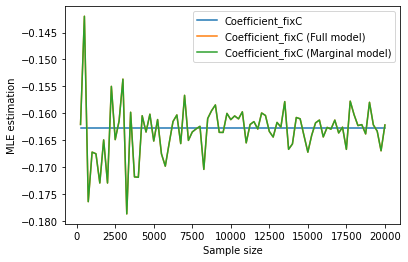

In [11]:
ax = eco_df_rho_fixC.plot(x='index', y='Coefficient_fixC')
eco_df_rho_fixC.plot(x='index', y='Coefficient_fixC (Full model)',ax=ax)
eco_df_rho_fixC.plot(x='index', y='Coefficient_fixC (Marginal model)', ax=ax)
plt.xlabel("Sample size")
plt.ylabel("MLE estimation")
plt.savefig('Coefficient_fixC.png',bbox_inches='tight', dpi=500)#保存图片

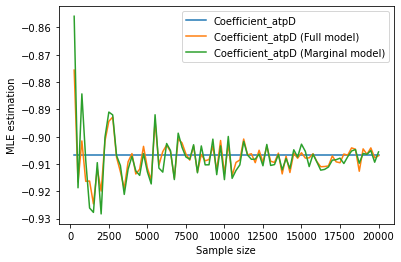

In [12]:
ax = eco_df_rho_atpD.plot(x='index', y='Coefficient_atpD')
eco_df_rho_atpD.plot(x='index', y='Coefficient_atpD (Full model)',ax=ax)
eco_df_rho_atpD.plot(x='index', y='Coefficient_atpD (Marginal model)', ax=ax)
plt.xlabel("Sample size")
plt.ylabel("MLE estimation")
plt.savefig('Coefficient_atpD.png',bbox_inches='tight', dpi=500)#保存图片

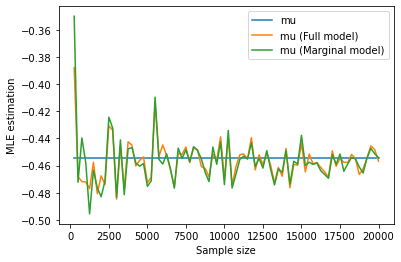

In [13]:
ax = eco_df_mu.plot(x='index', y='mu')
eco_df_mu.plot(x='index', y='mu (Full model)',ax=ax)
eco_df_mu.plot(x='index', y='mu (Marginal model)', ax=ax)
plt.xlabel("Sample size")
plt.ylabel("MLE estimation")
plt.savefig('mu.png',bbox_inches='tight', dpi=500)#保存图片

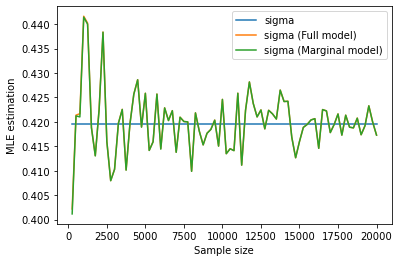

In [14]:
ax = eco_df_gamma.plot(x='index', y='sigma')
eco_df_gamma.plot(x='index', y='sigma (Full model)',ax=ax)
eco_df_gamma.plot(x='index', y='sigma (Marginal model)', ax=ax)
plt.xlabel("Sample size")
plt.ylabel("MLE estimation")
plt.savefig('sigma.png',bbox_inches='tight', dpi=500)#保存图片

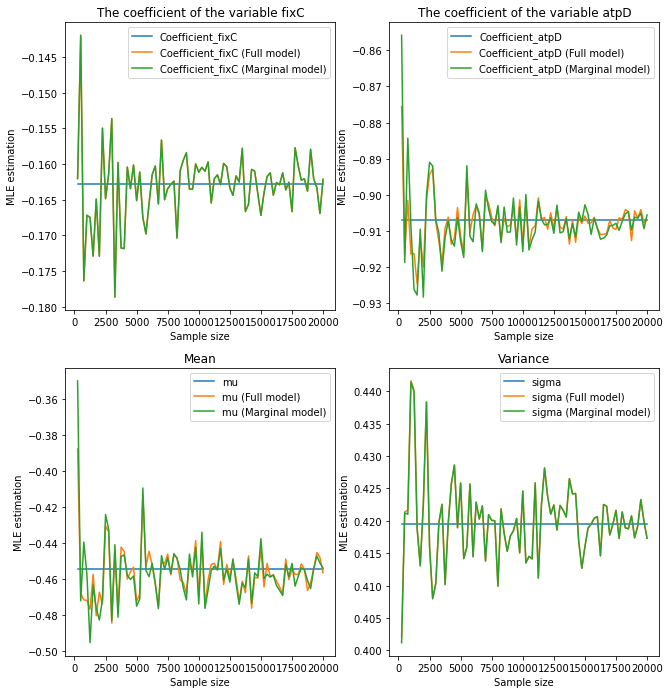

In [25]:


x1 = eco_df_rho_fixC['index']
y11 = eco_df_rho_fixC['Coefficient_fixC']
y12 = eco_df_rho_fixC['Coefficient_fixC (Full model)']
y13 = eco_df_rho_fixC['Coefficient_fixC (Marginal model)']

x2 = eco_df_rho_atpD['index']
y21 = eco_df_rho_atpD['Coefficient_atpD']
y22 = eco_df_rho_atpD['Coefficient_atpD (Full model)']
y23 = eco_df_rho_atpD['Coefficient_atpD (Marginal model)']


x3 = eco_df_mu['index']
y31 = eco_df_mu['mu']
y32 = eco_df_mu['mu (Full model)']
y33 = eco_df_mu['mu (Marginal model)']

x4 = eco_df_gamma['index']
y41 = eco_df_gamma['sigma']
y42 = eco_df_gamma['sigma (Full model)']
y43 = eco_df_gamma['sigma (Marginal model)']



ax1 = plt.subplot(221)
ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax1.plot(x1, y11,label = 'Coefficient_fixC')
ax1.plot(x1, y12,label = 'Coefficient_fixC (Full model)')
ax1.plot(x1, y13, label = 'Coefficient_fixC (Marginal model)')
ax1.set_xlabel("Sample size")
ax1.set_ylabel("MLE estimation")
ax1.set_title("The coefficient of the variable fixC")
plt.legend()

ax2 = plt.subplot(222)
ax2.margins(0.05)           # Values >0.0 zoom out
ax2.plot(x2,y21, label = 'Coefficient_atpD')
ax2.plot(x2,y22, label = 'Coefficient_atpD (Full model)')
ax2.plot(x2,y23, label = 'Coefficient_atpD (Marginal model)')
ax2.set_xlabel("Sample size")
ax2.set_ylabel("MLE estimation")
ax2.set_title("The coefficient of the variable atpD")
plt.legend()

ax3 = plt.subplot(223)
ax3.margins(0.05)           # Values >0.0 zoom out
ax3.plot(x3,y31, label = 'mu')
ax3.plot(x3,y32, label = 'mu (Full model)')
ax3.plot(x3,y33, label = 'mu (Marginal model)')
ax3.set_xlabel("Sample size")
ax3.set_ylabel("MLE estimation")
ax3.set_title("Mean")
plt.legend()

ax4 = plt.subplot(224)
ax4.margins(0.05)           # Values >0.0 zoom out
ax4.plot(x4,y41,label ='sigma')
ax4.plot(x4,y42,label ='sigma (Full model)')
ax4.plot(x4,y43,label ='sigma (Marginal model)')
ax4.set_xlabel("Sample size")
ax4.set_ylabel("MLE estimation")
ax4.set_title("Variance")
plt.legend()

plt.subplots_adjust(bottom=0, right=1.5, top=2.2)
plt.savefig('Continue.png', dpi=500, bbox_inches='tight')
plt.show()